<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flood           44 non-null     object 
 1   exposed_(mn)    44 non-null     float64
 2   displaced_(k)   44 non-null     int64  
 3   killed          44 non-null     int64  
 4   duration(days)  44 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.8+ KB
None
        exposed_(mn)  displaced_(k)      killed  duration(days)
count      44.000000      44.000000   44.000000       44.000000
mean    82170.301136   36680.704545   22.045455       25.931818
std     93503.771608   93180.800088   44.923167       47.073618
min         0.200000       0.000000    0.000000        2.000000
25%       550.750000      28.750000    0.000000        6.000000
50%     59701.000000    3000.000000    3.500000       13.000000
75%    109740.500000   16250.000000   15.500000       25.250000
max 

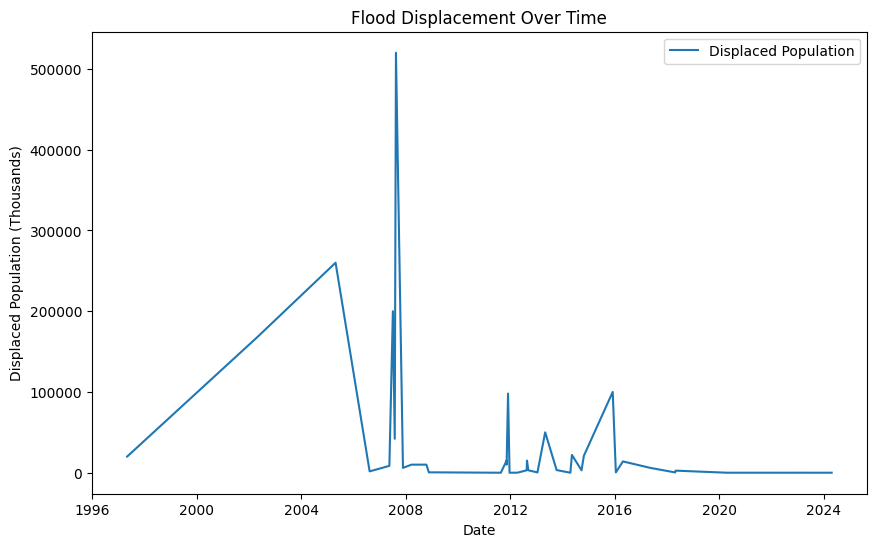

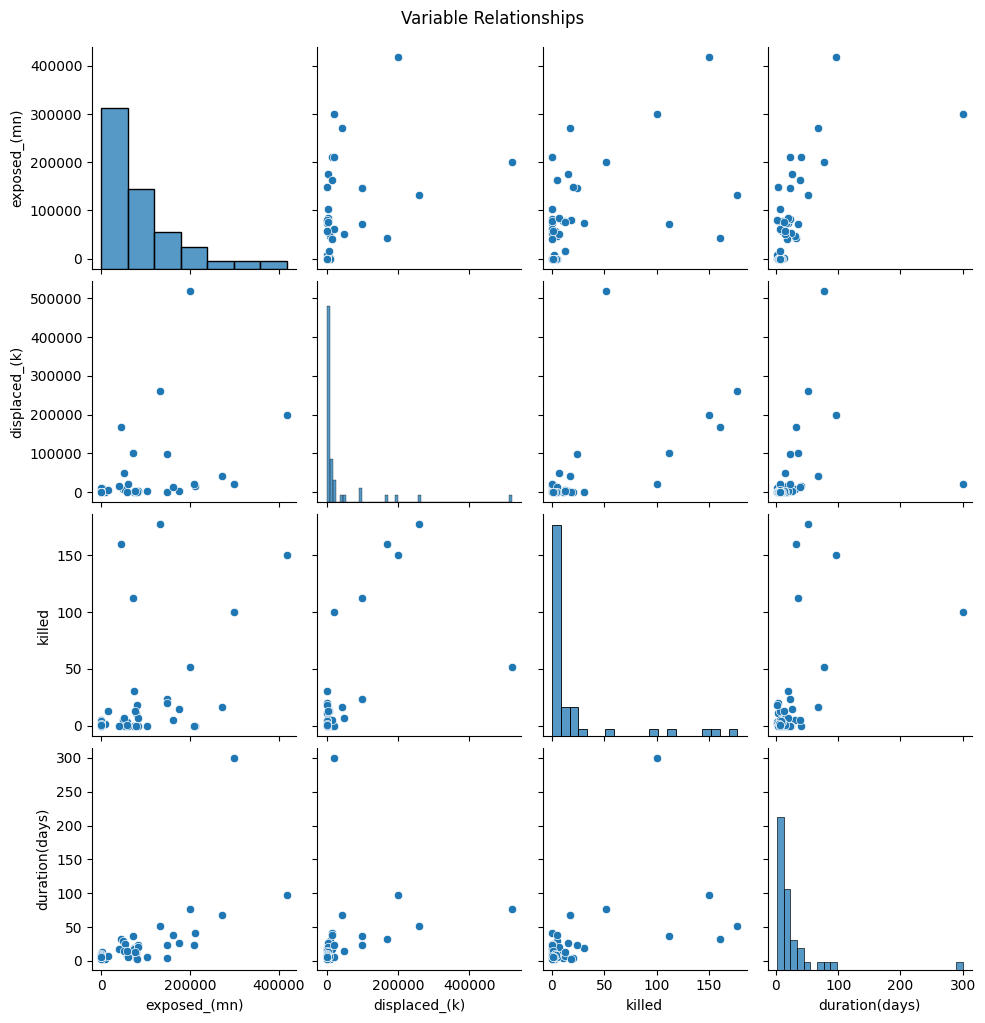

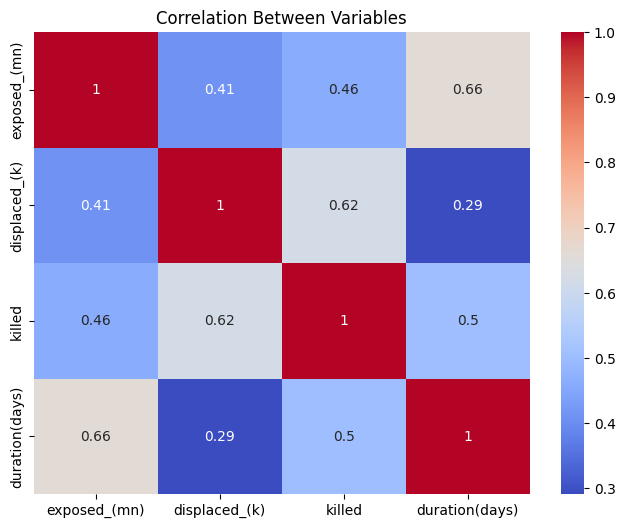

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data_path = '../data/processed/cleaned_flood_data.csv'
df = pd.read_csv(data_path)

# Check data structure
print(df.info())
print(df.describe())

# Convert flood date to datetime if not done
df['flood'] = pd.to_datetime(df['flood'], errors='coerce')
df.dropna(subset=['flood'], inplace=True)  # Drop any invalid date rows

# Plot flood occurrences over time
plt.figure(figsize=(10, 6))
plt.plot(df['flood'], df['displaced_(k)'], label='Displaced Population')
plt.xlabel('Date')
plt.ylabel('Displaced Population (Thousands)')
plt.title('Flood Displacement Over Time')
plt.legend()
plt.show()

# Plot relationships between variables
sns.pairplot(df[['exposed_(mn)', 'displaced_(k)', 'killed', 'duration(days)']])
plt.suptitle('Variable Relationships', y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['exposed_(mn)', 'displaced_(k)', 'killed', 'duration(days)']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Variables')
plt.show()